In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094")

rows,columns=df.shape
print(f'The dataset has {rows} rows and {columns} columns\n')

# Display basic info
print(df.info(), '\n')

# Display first few records
print(df.head(), '\n')

# Convert categorical columns to 'category' type
categorical_cols = ["Gender", "Age", "City_Category", "Stay_In_Current_City_Years", "Marital_Status", "Product_ID", "Product_Category"]
for col in categorical_cols:
    df[col] = df[col].astype("category")

df['User_ID']=df['User_ID'].astype('str')

# Summary statistics
print(df.describe())

# Display basic info
print(df.info(), '\n')



The dataset has 550068 rows and 10 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB
None 

   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17     

In [20]:
# Check missing values
print(df.isnull().sum(),'\n')

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64 



<Axes: xlabel='Purchase', ylabel='Count'>

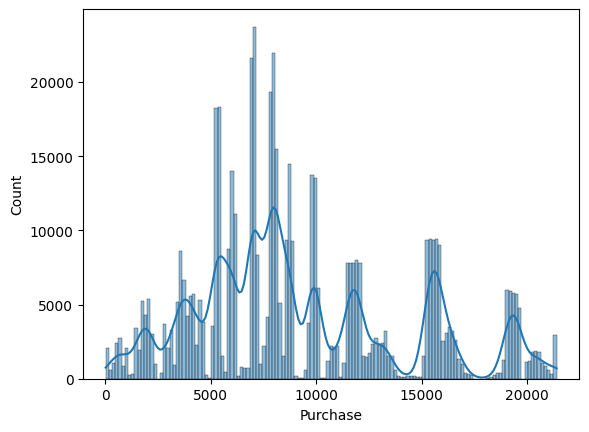

In [85]:
sns.histplot(df['Purchase'], kde = True)

Given Population data is not Normal.

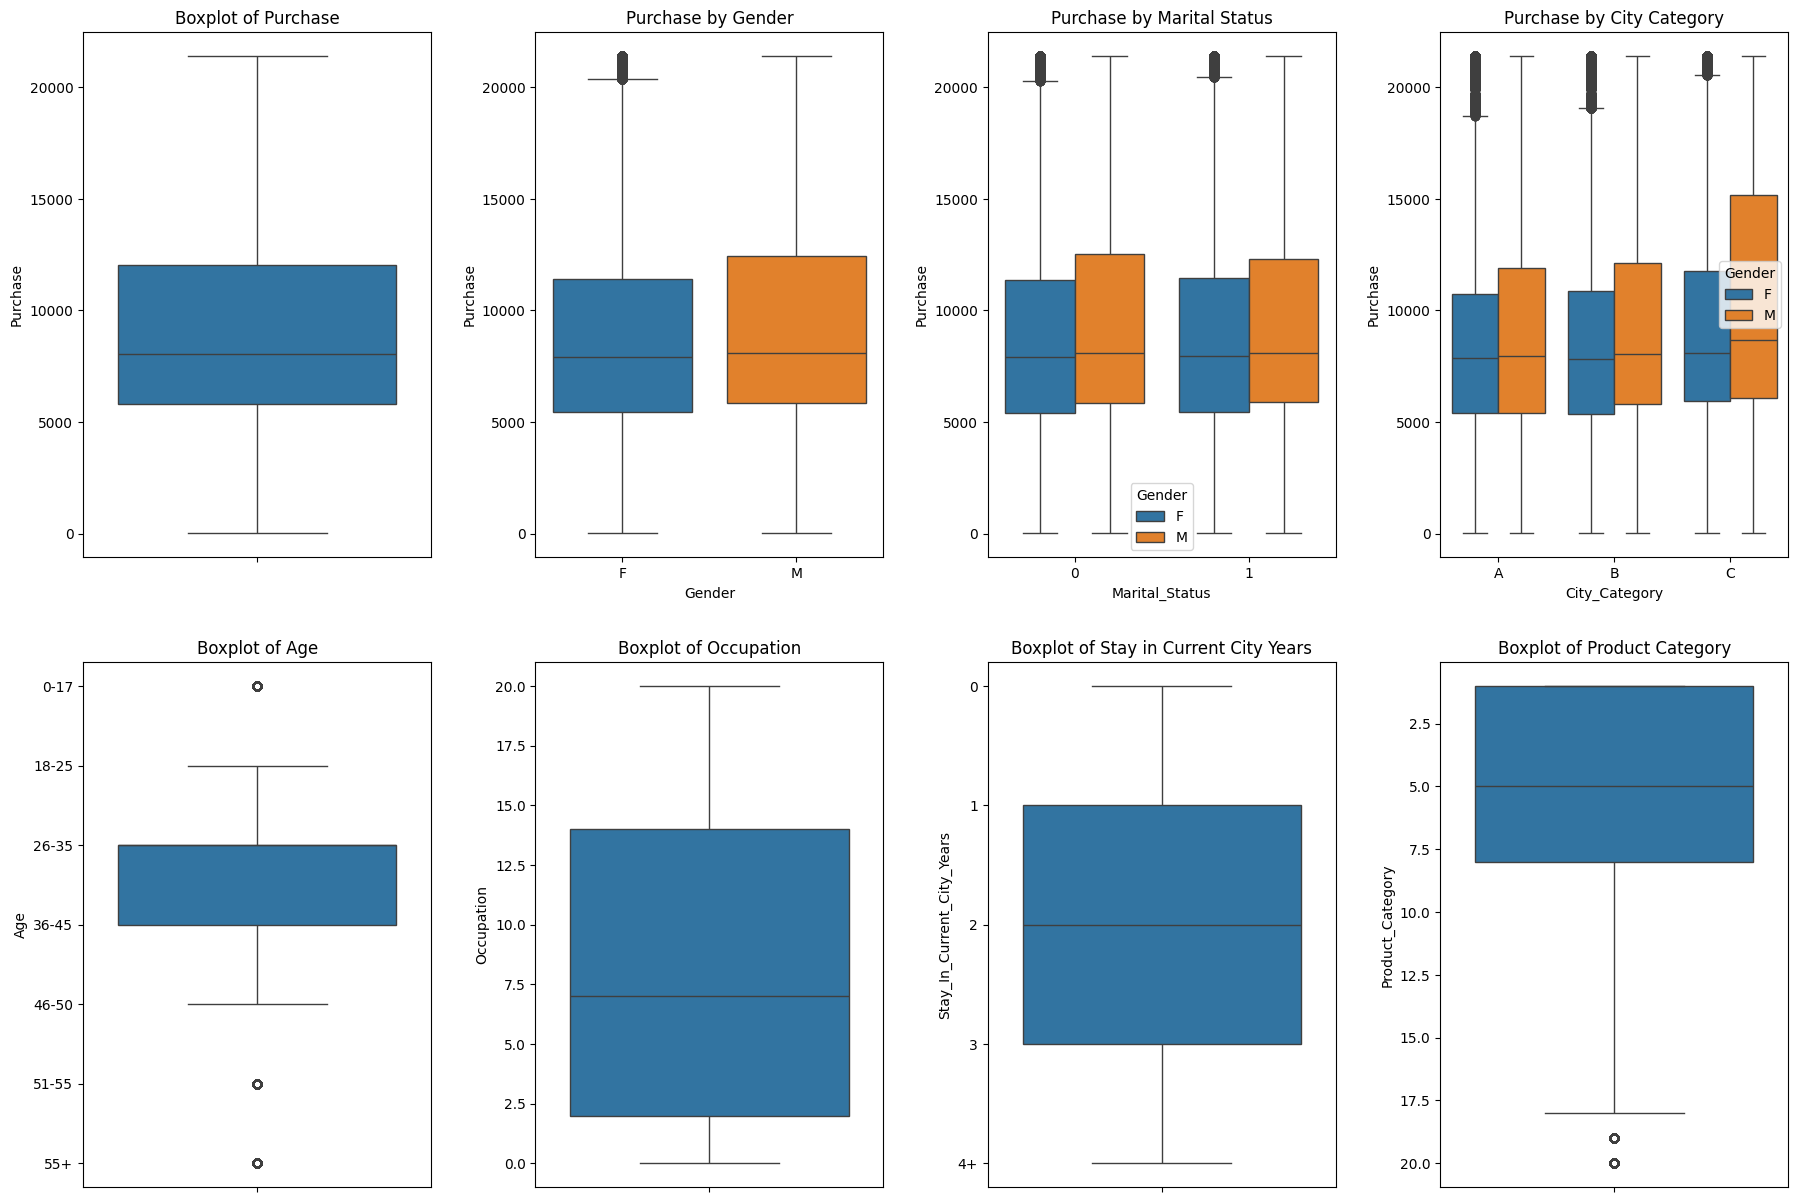

In [71]:
figure = plt.figure(figsize=(22, 15))

plt.subplot(2, 4, 1)
sns.boxplot(data=df['Purchase'])
plt.title('Boxplot of Purchase')

plt.subplot(2, 4, 2)
sns.boxplot(data=df, x='Gender', y='Purchase', hue='Gender')
plt.title('Purchase by Gender')

plt.subplot(2, 4, 3)
sns.boxplot(data=df, x='Marital_Status', y='Purchase', hue='Gender')
plt.title('Purchase by Marital Status')

plt.subplot(2, 4, 4)
sns.boxplot(data=df, x='City_Category', y='Purchase', hue='Gender')
plt.title('Purchase by City Category')

plt.subplot(2, 4, 5)
sns.boxplot(data=df['Age'])
plt.title('Boxplot of Age')

plt.subplot(2, 4, 6)
sns.boxplot(data=df['Occupation'])
plt.title('Boxplot of Occupation')

plt.subplot(2, 4, 7)
sns.boxplot(data=df['Stay_In_Current_City_Years'])
plt.title('Boxplot of Stay in Current City Years')

plt.subplot(2, 4, 8)
sns.boxplot(data=df['Product_Category'])
plt.title('Boxplot of Product Category')

plt.subplots_adjust(wspace=0.3)
plt.show()

Text(0.5, 1.0, 'Purchase by Marital Status')

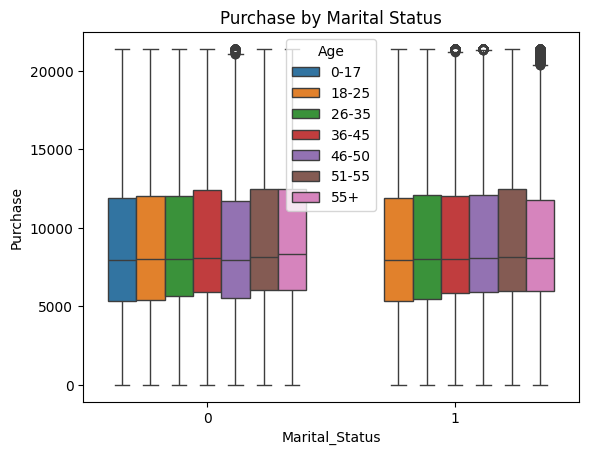

In [100]:
sns.boxplot(data=df, x='Marital_Status', y='Purchase', hue='Age')
plt.title('Purchase by Marital Status')

no apparent significant difference of Age, Marital Status, City Category and Purchase from the plots but males purchasing a bit higher than females.

Text(0.5, 1.0, 'Purchase by Marital Status')

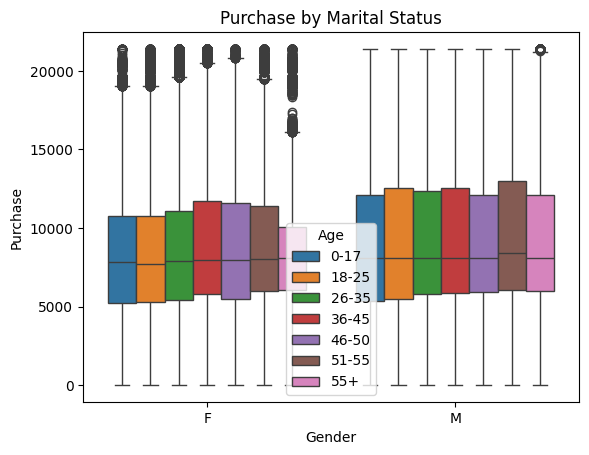

In [101]:
sns.boxplot(data=df, x='Gender', y='Purchase', hue='Age')
plt.title('Purchase by Marital Status')

no apparent significant difference of Age and Gender from the plots.

Text(0.5, 1.0, 'Purchase by City_Category')

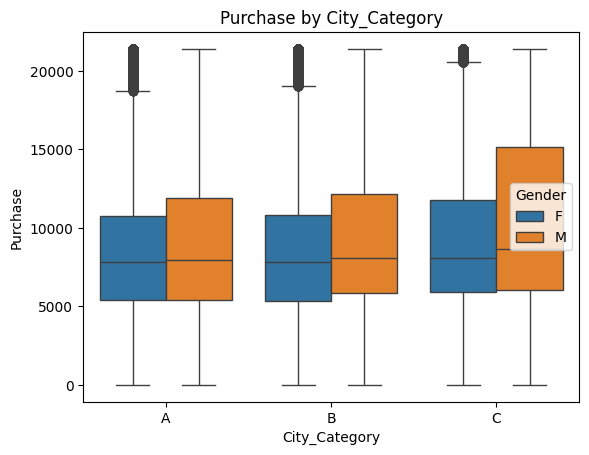

In [93]:
sns.boxplot(data=df, x='City_Category', y='Purchase', hue='Gender')
plt.title('Purchase by City_Category')

<Axes: xlabel='Product_Category', ylabel='Purchase'>

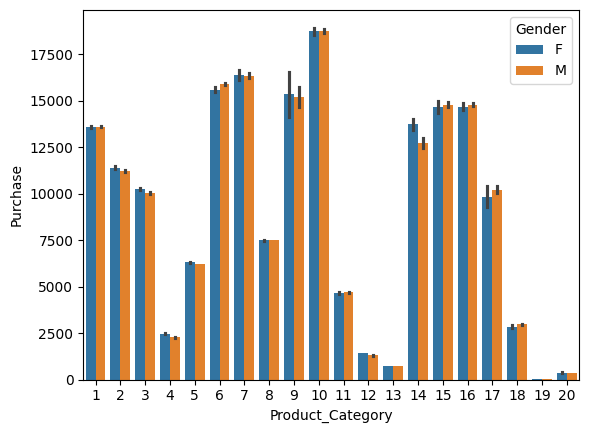

In [75]:
sns.barplot(x= 'Product_Category', y= 'Purchase', hue= 'Gender' ,data=df)

Product Category 11 is the highest purchased and no difference between male and female.

<Axes: xlabel='Product_Category', ylabel='count'>

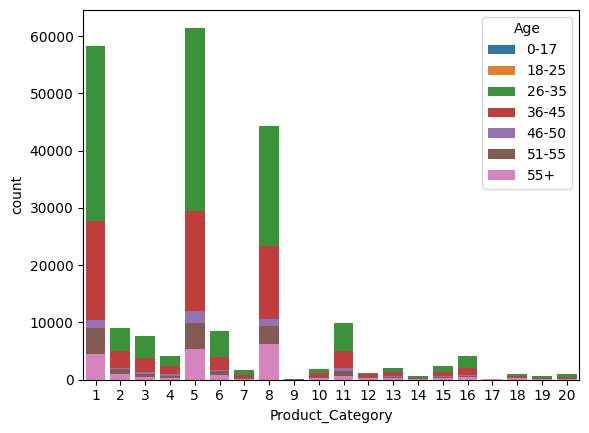

In [80]:
sns.countplot(x='Product_Category', hue= 'Age', data=df, dodge =False)

Age group of 26-35 are the highest in every product category followed by 36-45.

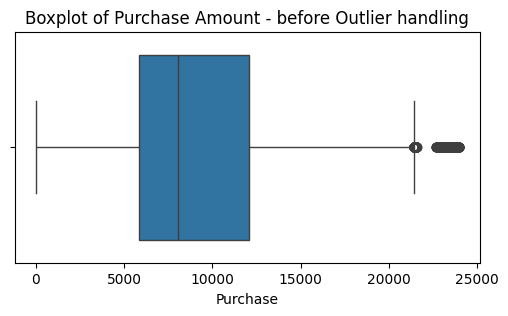

The lower bound for purchase column : -3523.5
The Upper bound for Purchase column : 21400.5
Outliers:
        User_ID Product_ID Gender    Age  Occupation City_Category  \
343     1000058  P00117642      M  26-35           2             B   
375     1000062  P00119342      F  36-45           3             A   
652     1000126  P00087042      M  18-25           9             B   
736     1000139  P00159542      F  26-35          20             C   
1041    1000175  P00052842      F  26-35           2             B   
...         ...        ...    ...    ...         ...           ...   
544488  1005815  P00116142      M  26-35          20             B   
544704  1005847  P00085342      F  18-25           4             B   
544743  1005852  P00202242      F  26-35           1             A   
545663  1006002  P00116142      M  51-55           0             C   
545787  1006018  P00052842      M  36-45           1             C   

       Stay_In_Current_City_Years Marital_Status Product_

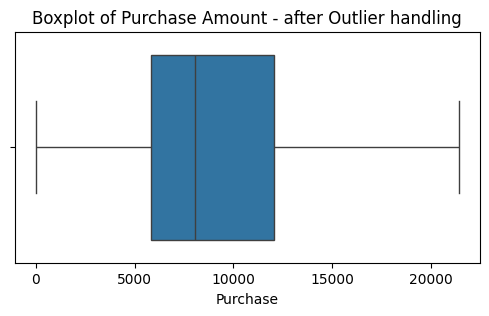

In [22]:


# Visualizing outliers for 'Purchase'
plt.figure(figsize=(6,3))
sns.boxplot(x=df["Purchase"])
plt.title("Boxplot of Purchase Amount - before Outlier handling")
plt.show()

# Handling Outliers using IQR
Q1 = df["Purchase"].quantile(0.25)
Q3 = df["Purchase"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df["Purchase"] < lower_bound) | (df["Purchase"] > upper_bound)]
print(f'The lower bound for purchase column : {lower_bound}\nThe Upper bound for Purchase column : {upper_bound}')
print("Outliers:",outliers,sep='\n')

# Clip the outliers
df["Purchase"] = np.clip(df["Purchase"], lower_bound, upper_bound)

# Visualizing outliers for 'Purchase'
plt.figure(figsize=(6,3))
sns.boxplot(x=df["Purchase"])
plt.title("Boxplot of Purchase Amount - after Outlier handling")
plt.show()


The analysis reveals that the upper bound for the "Purchase" column, determined using the interquartile range (IQR) method, is **21400.5**. Any value exceeding this threshold is classified as an outlier. A review of the dataset identifies **2,677 records** surpassing this limit, indicating the presence of outliers in the "Purchase" column.

,count
Gender,
M,414259
F,135809


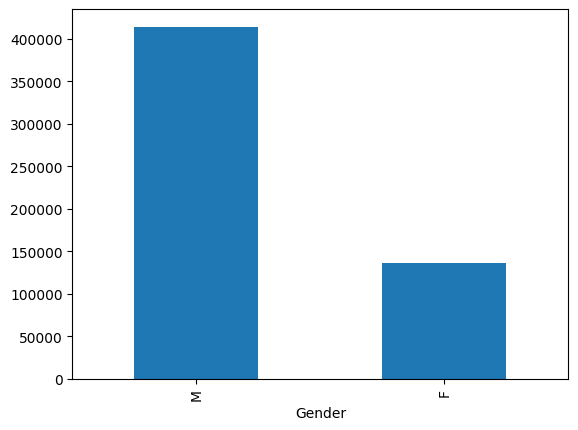

In [27]:
gender_count = df['Gender'].value_counts()
gender_count.plot(kind='bar')
gender_count

<ipython-input-28-4a1ea86405c2>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_spending = df.groupby("Gender")["Purchase"].sum()


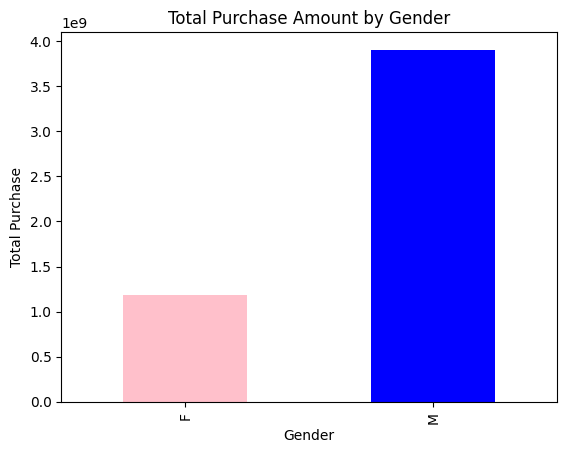

In [28]:
# Compare purchase amount between Male and Female customers.
# Aggregate purchase amount per gender
gender_spending = df.groupby("Gender")["Purchase"].sum()

# Bar plot
gender_spending.plot(kind="bar", color=["pink", "blue"])
plt.title("Total Purchase Amount by Gender")
plt.ylabel("Total Purchase")
plt.show()


<ipython-input-24-107d246efc87>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_gender_spend = df.groupby('Gender')['Purchase'].mean().reset_index()


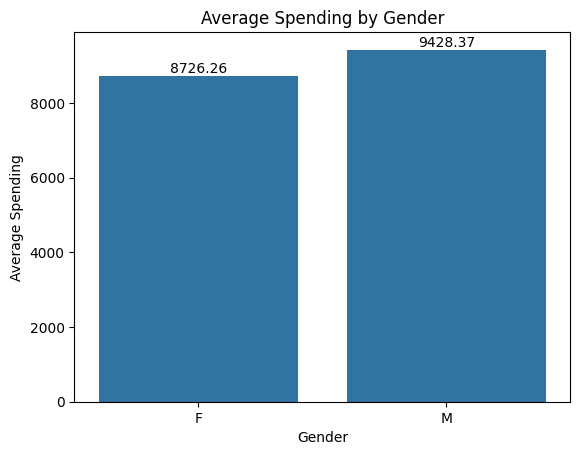

In [24]:
# Calculate average spending by gender
avg_gender_spend = df.groupby('Gender')['Purchase'].mean().reset_index()

# Create the barplot
sns.barplot(data=avg_gender_spend, x='Gender', y='Purchase')

# Add the value labels on top of each bar
for index, value in enumerate(avg_gender_spend['Purchase']):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Average Spending')
plt.title('Average Spending by Gender')

# Show the plot
plt.show()

The analysis shows that the average purchase per order is higher among male customers.

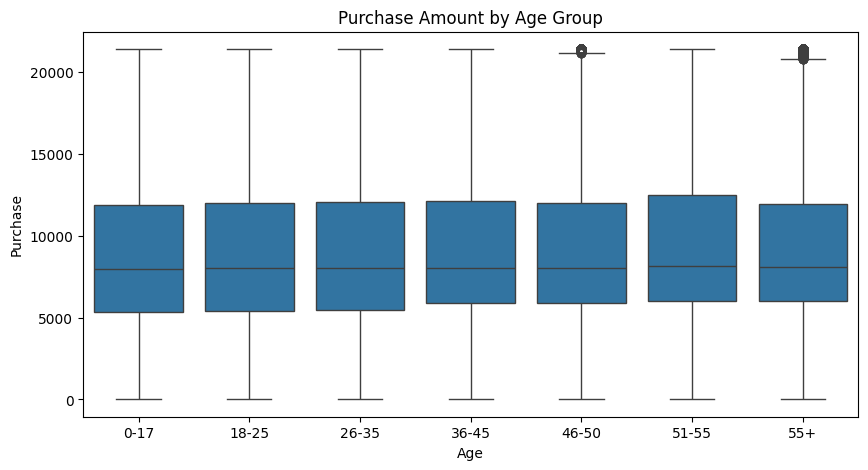

In [29]:
# Analyze product purchase trends across different age groups.

plt.figure(figsize=(10, 5))
sns.boxplot(x="Age", y="Purchase", data=df)
plt.title("Purchase Amount by Age Group")
plt.show()


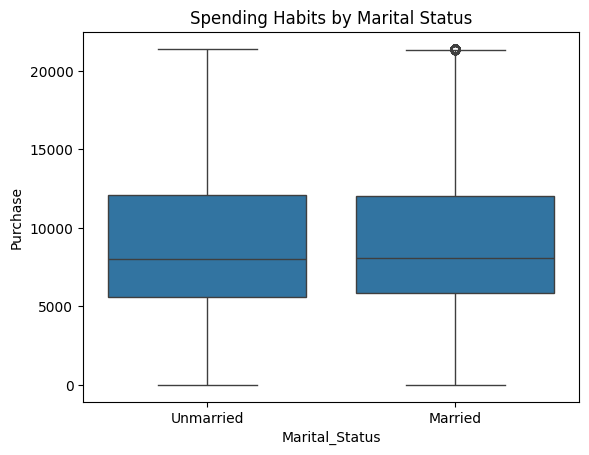

In [30]:
# Marital Status and Spending Habits

sns.boxplot(x="Marital_Status", y="Purchase", data=df)
plt.title("Spending Habits by Marital Status")
plt.xticks([0, 1], ["Unmarried", "Married"])
plt.show()


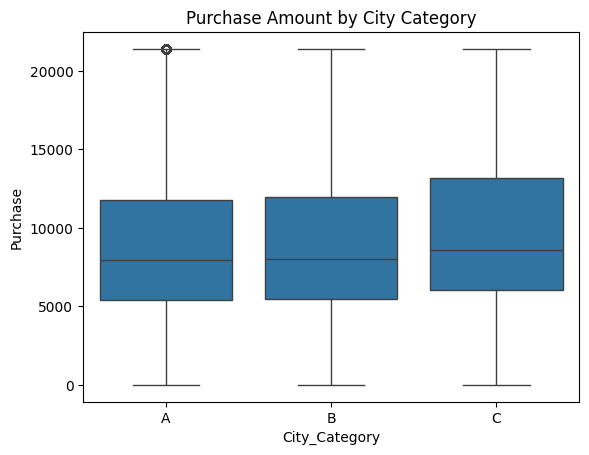

In [32]:
#  City Category vs Spending

sns.boxplot(x="City_Category", y="Purchase", data=df)
plt.title("Purchase Amount by City Category")
plt.show()


In [56]:
# Confidence Interval for Male and Female Customers

import scipy.stats as stats

# Sample mean and standard error
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    sem = stats.sem(data)
    margin = sem * stats.t.ppf((1 + confidence) / 2., len(data) - 1)
    return mean - margin, mean + margin, mean

male_spending = df[df["Gender"] == "M"]["Purchase"]
female_spending = df[df["Gender"] == "F"]["Purchase"]

ci_male = confidence_interval(male_spending, 0.90)
ci_female = confidence_interval(female_spending, 0.90)

print("Confidence Interval for Male Spending - Whole Data @ 90 Confidence:", ci_male[:-1])
print("Confidence Interval for Female Spending - Whole Data @ 90 Confidence:", ci_female[:-1])
print("Mean_Male :", ci_male[-1])
print("Mean_Female :", ci_female[-1])
print('\n')

ci_male = confidence_interval(male_spending)
ci_female = confidence_interval(female_spending)

print("Confidence Interval for Male Spending - Whole Data @ 95 Confidence:", ci_male[:-1])
print("Confidence Interval for Female Spending - Whole Data @ 95 Confidence:", ci_female[:-1])
print("Mean_Male :", ci_male[-1])
print("Mean_Female :", ci_female[-1])
print('\n')

ci_male = confidence_interval(male_spending, 0.99)
ci_female = confidence_interval(female_spending, 0.99)

print("Confidence Interval for Male Spending - Whole Data @ 99 Confidence:", ci_male[:-1])
print("Confidence Interval for Female Spending - Whole Data @ 99 Confidence:", ci_female[:-1])
print("Mean_Male :", ci_male[-1])
print("Mean_Female :", ci_female[-1])


Confidence Interval for Male Spending - Whole Data @ 90 Confidence: (9415.419819920962, 9441.327089621134)
Confidence Interval for Female Spending - Whole Data @ 90 Confidence: (8705.085330808766, 8747.42732299179)
Mean_Male : 9428.373454771048
Mean_Female : 8726.256326900279


Confidence Interval for Male Spending - Whole Data @ 95 Confidence: (9412.938236242586, 9443.80867329951)
Confidence Interval for Female Spending - Whole Data @ 95 Confidence: (8701.029476350725, 8751.483177449833)
Mean_Male : 9428.373454771048
Mean_Female : 8726.256326900279


Confidence Interval for Male Spending - Whole Data @ 99 Confidence: (9408.088104871078, 9448.658804671019)
Confidence Interval for Female Spending - Whole Data @ 99 Confidence: (8693.102454919743, 8759.410198880814)
Mean_Male : 9428.373454771048
Mean_Female : 8726.256326900279


In [83]:
# Confidence Interval for Different Sample Sizes

sample_sizes = [30, 300, 3000, 30000, 120000]
confidence_levels = [0.90, 0.95, 0.99]

# Dictionary to store non-overlapping confidence intervals
non_overlap_pairs = {}

for size in sample_sizes:
  for cl in confidence_levels:
      male_sample = np.random.choice(male_spending, size=size, replace=False)
      female_sample = np.random.choice(female_spending, size=size, replace=False)

      ci_male = confidence_interval(male_sample, cl)
      ci_female = confidence_interval(female_sample, cl)

      print(f"Sample Size: {size} @ {cl} Confidence")
      print("Mean_Male :", ci_male[-1])
      print(f"CI for Male Spending: {ci_male}")
      print("Mean_Female :", ci_female[-1])
      print(f"CI for Female Spending: {ci_female}\n")
      # Check if confidence intervals overlap
      if not (ci_male[1] >= ci_female[0] and ci_male[0] <= ci_female[1]):
        non_overlap_pairs[(size, cl)] = (ci_male, ci_female)

  print('\n')

# Print pairs with non-overlapping confidence intervals
if non_overlap_pairs:
    print("Cases where male and female confidence intervals do not overlap:")
    for key, intervals in non_overlap_pairs.items():
        print(f"Sample Size {key[0]} @ {key[1]} Confidence: {intervals}")
else:
    print("All confidence intervals overlap.")

Sample Size: 30 @ 0.9 Confidence
Mean_Male : 10200.733333333334
CI for Male Spending: (8668.760635109504, 11732.706031557163, 10200.733333333334)
Mean_Female : 9700.966666666667
CI for Female Spending: (8256.587066362881, 11145.346266970453, 9700.966666666667)

Sample Size: 30 @ 0.95 Confidence
Mean_Male : 10103.533333333333
CI for Male Spending: (7989.846197489385, 12217.22046917728, 10103.533333333333)
Mean_Female : 8751.366666666667
CI for Female Spending: (7030.509230729626, 10472.224102603706, 8751.366666666667)

Sample Size: 30 @ 0.99 Confidence
Mean_Male : 10427.166666666666
CI for Male Spending: (7595.909871142821, 13258.42346219051, 10427.166666666666)
Mean_Female : 7765.766666666666
CI for Female Spending: (5588.5398162567435, 9942.99351707659, 7765.766666666666)



Sample Size: 300 @ 0.9 Confidence
Mean_Male : 9312.4
CI for Male Spending: (8861.211975453109, 9763.58802454689, 9312.4)
Mean_Female : 8707.135
CI for Female Spending: (8234.106821533067, 9180.163178466933, 8707.1

As the sample size increases, the confidence intervals become narrower, enhancing the precision of estimating the population mean spending for both male and female customers. Conversely, increasing the confidence level results in wider intervals, reflecting greater certainty in the estimates.  

Across all sample sizes and confidence levels, male customers consistently exhibit a higher upper bound in their confidence intervals, suggesting a slightly higher average spending compared to female customers during Black Friday at Walmart.  

Notably, for sample sizes in (30,300) , the confidence intervals for male and female customers do not overlap, indicating a statistically significant difference in spending behavior, though the difference is relatively small.
For 3000 and above sample sizes we see overlapping intervals indicating insignificant spending behaviour.  

These insights suggest that Walmart could refine its marketing strategies and promotions to better align with the spending patterns of male and female customers during Black Friday, leveraging these observed differences to maximize engagement and sales.

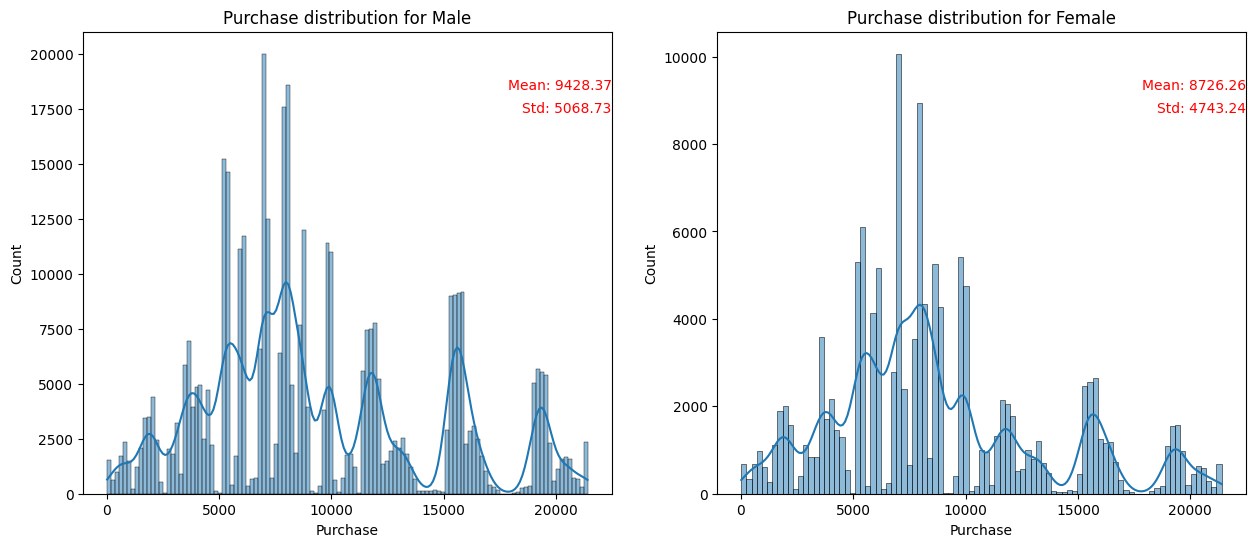

In [37]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(male_spending,kde=True)
plt.text(plt.xlim()[1], plt.ylim()[1]*0.9, f"Mean: {male_spending.mean():.2f}", ha='right', va='top', color='r')
plt.text(plt.xlim()[1], plt.ylim()[1]*0.85, f"Std: {male_spending.std():.2f}", ha='right', va='top', color='r')
plt.title('Purchase distribution for Male')
plt.subplot(1,2,2)

sns.histplot(female_spending,kde=True)
plt.text(plt.xlim()[1], plt.ylim()[1]*0.9, f"Mean: {female_spending.mean():.2f}", ha='right', va='top', color='r')
plt.text(plt.xlim()[1], plt.ylim()[1]*0.85, f"Std: {female_spending.std():.2f}", ha='right', va='top', color='r')
plt.title('Purchase distribution for Female')
plt.show()

In [46]:
sample_30_male=[np.mean(male_spending.sample(30)) for i in range(10000)]
sample_30_female=[np.mean(female_spending.sample(30)) for i in range(10000)]

sample_300_male=[np.mean(male_spending.sample(300)) for i in range(10000)]
sample_300_female=[np.mean(female_spending.sample(300)) for i in range(10000)]

sample_3000_male=[np.mean(male_spending.sample(3000)) for i in range(10000)]
sample_3000_female=[np.mean(female_spending.sample(3000)) for i in range(10000)]

sample_30000_male=[np.mean(male_spending.sample(30000)) for i in range(10000)]
sample_30000_female=[np.mean(female_spending.sample(30000)) for i in range(10000)]

sample_120000_male=[np.mean(male_spending.sample(120000)) for i in range(10000)]
sample_120000_female=[np.mean(female_spending.sample(120000)) for i in range(10000)]

Plotting all five sample (30, 300, 3000, 30000 and 120000) with 95% confidence level

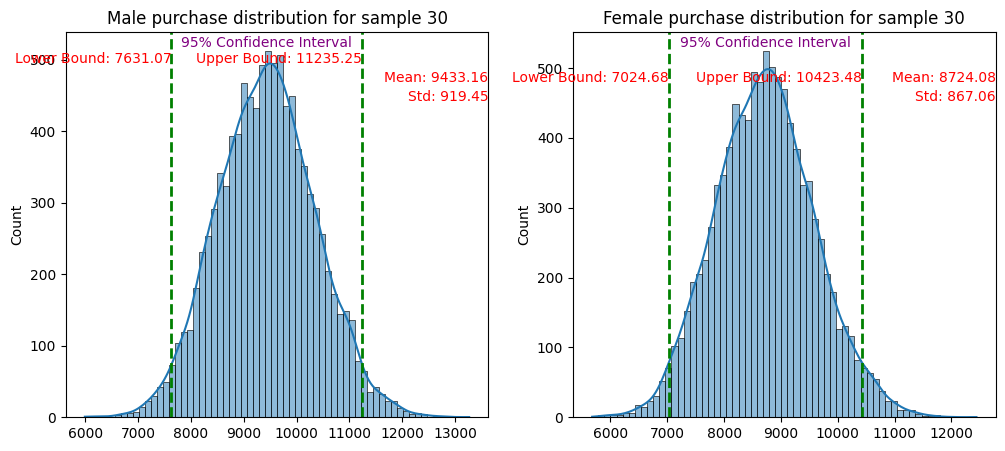

In [53]:
# Calculate confidence intervals
male_95_conf_interval_sample_30 = stats.norm.interval(0.95, loc=np.mean(sample_30_male), scale=np.std(sample_30_male))
female_95_conf_interval_sample_30 = stats.norm.interval(0.95, loc=np.mean(sample_30_female), scale=np.std(sample_30_female))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(sample_30_male,kde=True)
plt.text(plt.xlim()[1], plt.ylim()[1]*0.9, f"Mean: {np.mean(sample_30_male):.2f}", ha='right', va='top', color='r')
plt.text(plt.xlim()[1], plt.ylim()[1]*0.85, f"Std: {np.std(sample_30_male):.2f}", ha='right', va='top', color='r')
plt.text(np.mean(male_95_conf_interval_sample_30), plt.ylim()[1]*0.99, "95% Confidence Interval", ha='center', va='top', color='purple')

plt.axvline(male_95_conf_interval_sample_30[0], color='g', linestyle='--', linewidth=2, label='Lower Bound')
plt.axvline(male_95_conf_interval_sample_30[1], color='g', linestyle='--', linewidth=2, label='Upper Bound')
plt.text(male_95_conf_interval_sample_30[0], plt.ylim()[1]*0.95, f"Lower Bound: {male_95_conf_interval_sample_30[0]:.2f}", ha='right', va='top', color='r')
plt.text(male_95_conf_interval_sample_30[1], plt.ylim()[1]*0.95, f"Upper Bound: {male_95_conf_interval_sample_30[1]:.2f}", ha='right', va='top', color='r')
plt.title('Male purchase distribution for sample 30')


plt.subplot(1,2,2)
sns.histplot(sample_30_female,kde=True)
plt.text(plt.xlim()[1], plt.ylim()[1]*0.9, f"Mean: {np.mean(sample_30_female):.2f}", ha='right', va='top', color='r')
plt.text(plt.xlim()[1], plt.ylim()[1]*0.85, f"Std: {np.std(sample_30_female):.2f}", ha='right', va='top', color='r')
plt.text(np.mean(female_95_conf_interval_sample_30), plt.ylim()[1]*0.99, "95% Confidence Interval", ha='center', va='top', color='purple')

plt.axvline(female_95_conf_interval_sample_30[0], color='g', linestyle='--', linewidth=2, label='Lower Bound')
plt.axvline(female_95_conf_interval_sample_30[1], color='g', linestyle='--', linewidth=2, label='Upper Bound')
plt.text(female_95_conf_interval_sample_30[0], plt.ylim()[1]*0.9, f"Lower Bound: {female_95_conf_interval_sample_30[0]:.2f}", ha='right', va='top', color='r')
plt.text(female_95_conf_interval_sample_30[1], plt.ylim()[1]*0.9, f"Upper Bound: {female_95_conf_interval_sample_30[1]:.2f}", ha='right', va='top', color='r')
plt.title('Female purchase distribution for sample 30')

plt.show()

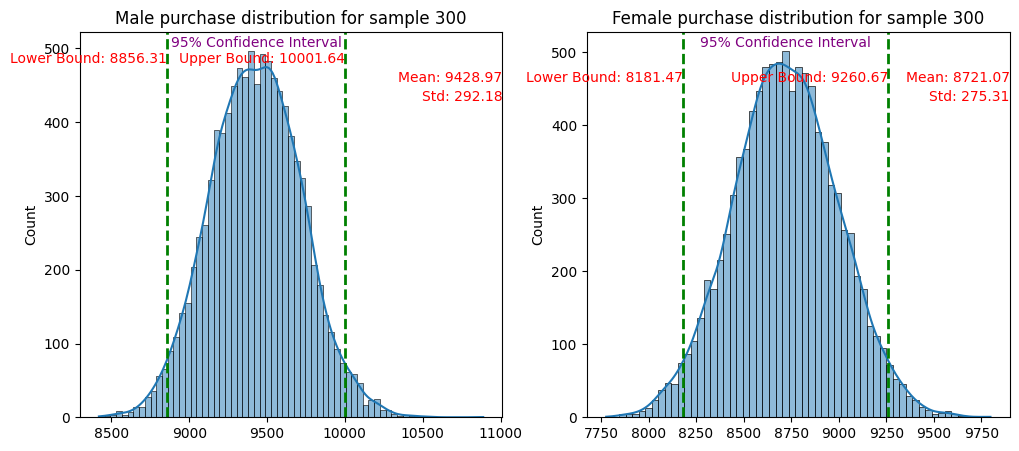

In [51]:
male_95_conf_interval_sample_300 = stats.norm.interval(0.95, loc=np.mean(sample_300_male), scale=np.std(sample_300_male))
female_95_conf_interval_sample_300 = stats.norm.interval(0.95, loc=np.mean(sample_300_female), scale=np.std(sample_300_female))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(sample_300_male,kde=True)
plt.text(plt.xlim()[1], plt.ylim()[1]*0.9, f"Mean: {np.mean(sample_300_male):.2f}", ha='right', va='top', color='r')
plt.text(plt.xlim()[1], plt.ylim()[1]*0.85, f"Std: {np.std(sample_300_male):.2f}", ha='right', va='top', color='r')
plt.text(np.mean(male_95_conf_interval_sample_300), plt.ylim()[1]*0.99, "95% Confidence Interval", ha='center', va='top', color='purple')

plt.axvline(male_95_conf_interval_sample_300[0], color='g', linestyle='--', linewidth=2, label='Lower Bound')
plt.axvline(male_95_conf_interval_sample_300[1], color='g', linestyle='--', linewidth=2, label='Upper Bound')
plt.text(male_95_conf_interval_sample_300[0], plt.ylim()[1]*0.95, f"Lower Bound: {male_95_conf_interval_sample_300[0]:.2f}", ha='right', va='top', color='r')
plt.text(male_95_conf_interval_sample_300[1], plt.ylim()[1]*0.95, f"Upper Bound: {male_95_conf_interval_sample_300[1]:.2f}", ha='right', va='top', color='r')
plt.title('Male purchase distribution for sample 300')

plt.subplot(1,2,2)
sns.histplot(sample_300_female,kde=True)
plt.text(plt.xlim()[1], plt.ylim()[1]*0.9, f"Mean: {np.mean(sample_300_female):.2f}", ha='right', va='top', color='r')
plt.text(plt.xlim()[1], plt.ylim()[1]*0.85, f"Std: {np.std(sample_300_female):.2f}", ha='right', va='top', color='r')
plt.text(np.mean(female_95_conf_interval_sample_300), plt.ylim()[1]*0.99, "95% Confidence Interval", ha='center', va='top', color='purple')

plt.axvline(female_95_conf_interval_sample_300[0], color='g', linestyle='--', linewidth=2, label='Lower Bound')
plt.axvline(female_95_conf_interval_sample_300[1], color='g', linestyle='--', linewidth=2, label='Upper Bound')
plt.text(female_95_conf_interval_sample_300[0], plt.ylim()[1]*0.9, f"Lower Bound: {female_95_conf_interval_sample_300[0]:.2f}", ha='right', va='top', color='r')
plt.text(female_95_conf_interval_sample_300[1], plt.ylim()[1]*0.9, f"Upper Bound: {female_95_conf_interval_sample_300[1]:.2f}", ha='right', va='top', color='r')
plt.title('Female purchase distribution for sample 300')

plt.show()

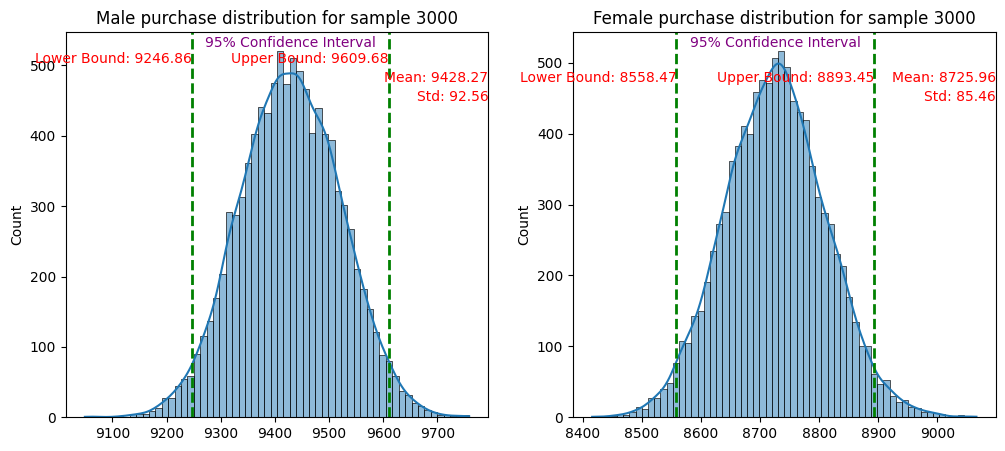

In [54]:
male_95_conf_interval_sample_3000 = stats.norm.interval(0.95, loc=np.mean(sample_3000_male), scale=np.std(sample_3000_male))
female_95_conf_interval_sample_3000 = stats.norm.interval(0.95, loc=np.mean(sample_3000_female), scale=np.std(sample_3000_female))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(sample_3000_male,kde=True)
plt.text(plt.xlim()[1], plt.ylim()[1]*0.9, f"Mean: {np.mean(sample_3000_male):.2f}", ha='right', va='top', color='r')
plt.text(plt.xlim()[1], plt.ylim()[1]*0.85, f"Std: {np.std(sample_3000_male):.2f}", ha='right', va='top', color='r')
plt.text(np.mean(male_95_conf_interval_sample_3000), plt.ylim()[1]*0.99, "95% Confidence Interval", ha='center', va='top', color='purple')

plt.axvline(male_95_conf_interval_sample_3000[0], color='g', linestyle='--', linewidth=2, label='Lower Bound')
plt.axvline(male_95_conf_interval_sample_3000[1], color='g', linestyle='--', linewidth=2, label='Upper Bound')
plt.text(male_95_conf_interval_sample_3000[0], plt.ylim()[1]*0.95, f"Lower Bound: {male_95_conf_interval_sample_3000[0]:.2f}", ha='right', va='top', color='r')
plt.text(male_95_conf_interval_sample_3000[1], plt.ylim()[1]*0.95, f"Upper Bound: {male_95_conf_interval_sample_3000[1]:.2f}", ha='right', va='top', color='r')
plt.title('Male purchase distribution for sample 3000')

plt.subplot(1,2,2)
sns.histplot(sample_3000_female,kde=True)
plt.text(plt.xlim()[1], plt.ylim()[1]*0.9, f"Mean: {np.mean(sample_3000_female):.2f}", ha='right', va='top', color='r')
plt.text(plt.xlim()[1], plt.ylim()[1]*0.85, f"Std: {np.std(sample_3000_female):.2f}", ha='right', va='top', color='r')
plt.text(np.mean(female_95_conf_interval_sample_3000), plt.ylim()[1]*0.99, "95% Confidence Interval", ha='center', va='top', color='purple')

plt.axvline(female_95_conf_interval_sample_3000[0], color='g', linestyle='--', linewidth=2, label='Lower Bound')
plt.axvline(female_95_conf_interval_sample_3000[1], color='g', linestyle='--', linewidth=2, label='Upper Bound')
plt.text(female_95_conf_interval_sample_3000[0], plt.ylim()[1]*0.9, f"Lower Bound: {female_95_conf_interval_sample_3000[0]:.2f}", ha='right', va='top', color='r')
plt.text(female_95_conf_interval_sample_3000[1], plt.ylim()[1]*0.9, f"Upper Bound: {female_95_conf_interval_sample_3000[1]:.2f}", ha='right', va='top', color='r')
plt.title('Female purchase distribution for sample 3000')

plt.show()

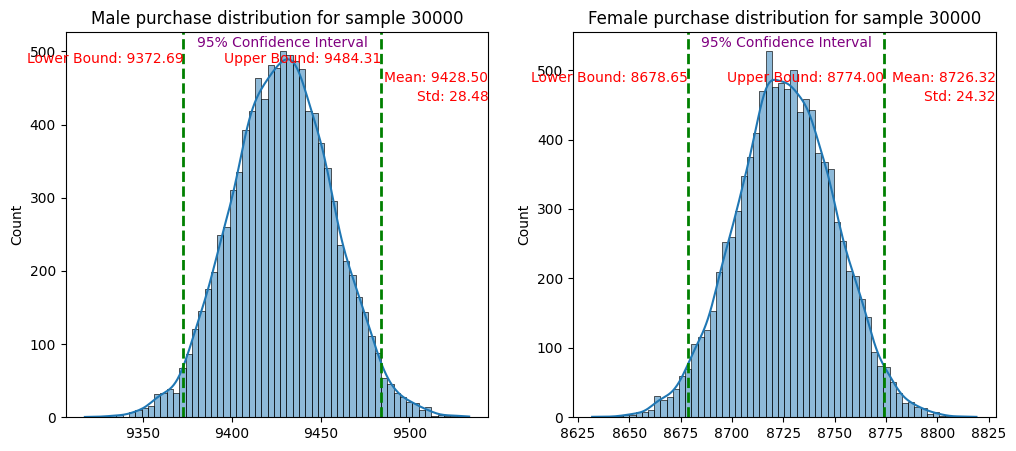

In [61]:
male_95_conf_interval_sample_30000 = stats.norm.interval(0.95, loc=np.mean(sample_30000_male), scale=np.std(sample_30000_male))
female_95_conf_interval_sample_30000 = stats.norm.interval(0.95, loc=np.mean(sample_30000_female), scale=np.std(sample_30000_female))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(sample_30000_male,kde=True)
plt.text(plt.xlim()[1], plt.ylim()[1]*0.9, f"Mean: {np.mean(sample_30000_male):.2f}", ha='right', va='top', color='r')
plt.text(plt.xlim()[1], plt.ylim()[1]*0.85, f"Std: {np.std(sample_30000_male):.2f}", ha='right', va='top', color='r')
plt.text(np.mean(male_95_conf_interval_sample_30000), plt.ylim()[1]*0.99, "95% Confidence Interval", ha='center', va='top', color='purple')

plt.axvline(male_95_conf_interval_sample_30000[0], color='g', linestyle='--', linewidth=2, label='Lower Bound')
plt.axvline(male_95_conf_interval_sample_30000[1], color='g', linestyle='--', linewidth=2, label='Upper Bound')
plt.text(male_95_conf_interval_sample_30000[0], plt.ylim()[1]*0.95, f"Lower Bound: {male_95_conf_interval_sample_30000[0]:.2f}", ha='right', va='top', color='r')
plt.text(male_95_conf_interval_sample_30000[1], plt.ylim()[1]*0.95, f"Upper Bound: {male_95_conf_interval_sample_30000[1]:.2f}", ha='right', va='top', color='r')
plt.title('Male purchase distribution for sample 30000')

plt.subplot(1,2,2)
sns.histplot(sample_30000_female,kde=True)
plt.text(plt.xlim()[1], plt.ylim()[1]*0.9, f"Mean: {np.mean(sample_30000_female):.2f}", ha='right', va='top', color='r')
plt.text(plt.xlim()[1], plt.ylim()[1]*0.85, f"Std: {np.std(sample_30000_female):.2f}", ha='right', va='top', color='r')
plt.text(np.mean(female_95_conf_interval_sample_30000), plt.ylim()[1]*0.99, "95% Confidence Interval", ha='center', va='top', color='purple')

plt.axvline(female_95_conf_interval_sample_30000[0], color='g', linestyle='--', linewidth=2, label='Lower Bound')
plt.axvline(female_95_conf_interval_sample_30000[1], color='g', linestyle='--', linewidth=2, label='Upper Bound')
plt.text(female_95_conf_interval_sample_30000[0], plt.ylim()[1]*0.9, f"Lower Bound: {female_95_conf_interval_sample_30000[0]:.2f}", ha='right', va='top', color='r')
plt.text(female_95_conf_interval_sample_30000[1], plt.ylim()[1]*0.9, f"Upper Bound: {female_95_conf_interval_sample_30000[1]:.2f}", ha='right', va='top', color='r')
plt.title('Female purchase distribution for sample 30000')

plt.show()

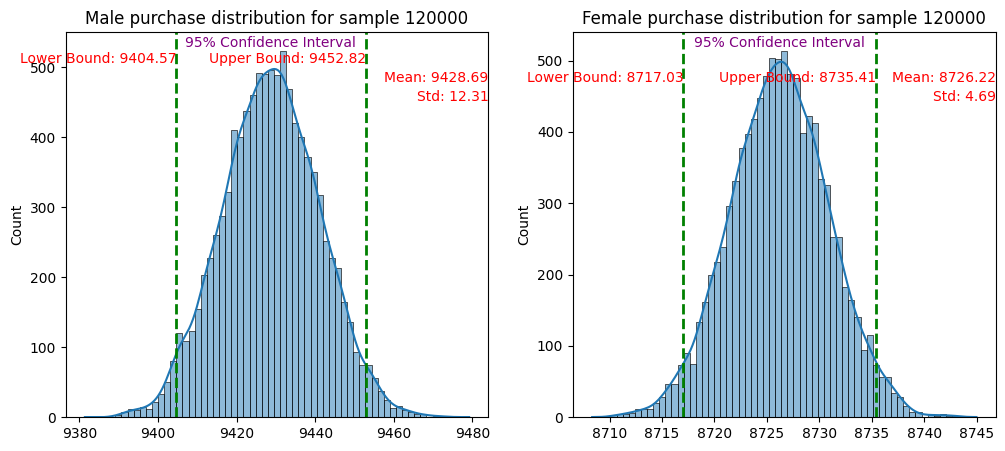

In [62]:
male_95_conf_interval_sample_120000 = stats.norm.interval(0.95, loc=np.mean(sample_120000_male), scale=np.std(sample_120000_male))
female_95_conf_interval_sample_120000 = stats.norm.interval(0.95, loc=np.mean(sample_120000_female), scale=np.std(sample_120000_female))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(sample_120000_male,kde=True)
plt.text(plt.xlim()[1], plt.ylim()[1]*0.9, f"Mean: {np.mean(sample_120000_male):.2f}", ha='right', va='top', color='r')
plt.text(plt.xlim()[1], plt.ylim()[1]*0.85, f"Std: {np.std(sample_120000_male):.2f}", ha='right', va='top', color='r')
plt.text(np.mean(male_95_conf_interval_sample_120000), plt.ylim()[1]*0.99, "95% Confidence Interval", ha='center', va='top', color='purple')

plt.axvline(male_95_conf_interval_sample_120000[0], color='g', linestyle='--', linewidth=2, label='Lower Bound')
plt.axvline(male_95_conf_interval_sample_120000[1], color='g', linestyle='--', linewidth=2, label='Upper Bound')
plt.text(male_95_conf_interval_sample_120000[0], plt.ylim()[1]*0.95, f"Lower Bound: {male_95_conf_interval_sample_120000[0]:.2f}", ha='right', va='top', color='r')
plt.text(male_95_conf_interval_sample_120000[1], plt.ylim()[1]*0.95, f"Upper Bound: {male_95_conf_interval_sample_120000[1]:.2f}", ha='right', va='top', color='r')
plt.title('Male purchase distribution for sample 120000')

plt.subplot(1,2,2)
sns.histplot(sample_120000_female,kde=True)
plt.text(plt.xlim()[1], plt.ylim()[1]*0.9, f"Mean: {np.mean(sample_120000_female):.2f}", ha='right', va='top', color='r')
plt.text(plt.xlim()[1], plt.ylim()[1]*0.85, f"Std: {np.std(sample_120000_female):.2f}", ha='right', va='top', color='r')
plt.text(np.mean(female_95_conf_interval_sample_120000), plt.ylim()[1]*0.99, "95% Confidence Interval", ha='center', va='top', color='purple')

plt.axvline(female_95_conf_interval_sample_120000[0], color='g', linestyle='--', linewidth=2, label='Lower Bound')
plt.axvline(female_95_conf_interval_sample_120000[1], color='g', linestyle='--', linewidth=2, label='Upper Bound')
plt.text(female_95_conf_interval_sample_120000[0], plt.ylim()[1]*0.9, f"Lower Bound: {female_95_conf_interval_sample_120000[0]:.2f}", ha='right', va='top', color='r')
plt.text(female_95_conf_interval_sample_120000[1], plt.ylim()[1]*0.9, f"Upper Bound: {female_95_conf_interval_sample_120000[1]:.2f}", ha='right', va='top', color='r')
plt.title('Female purchase distribution for sample 120000')

plt.show()

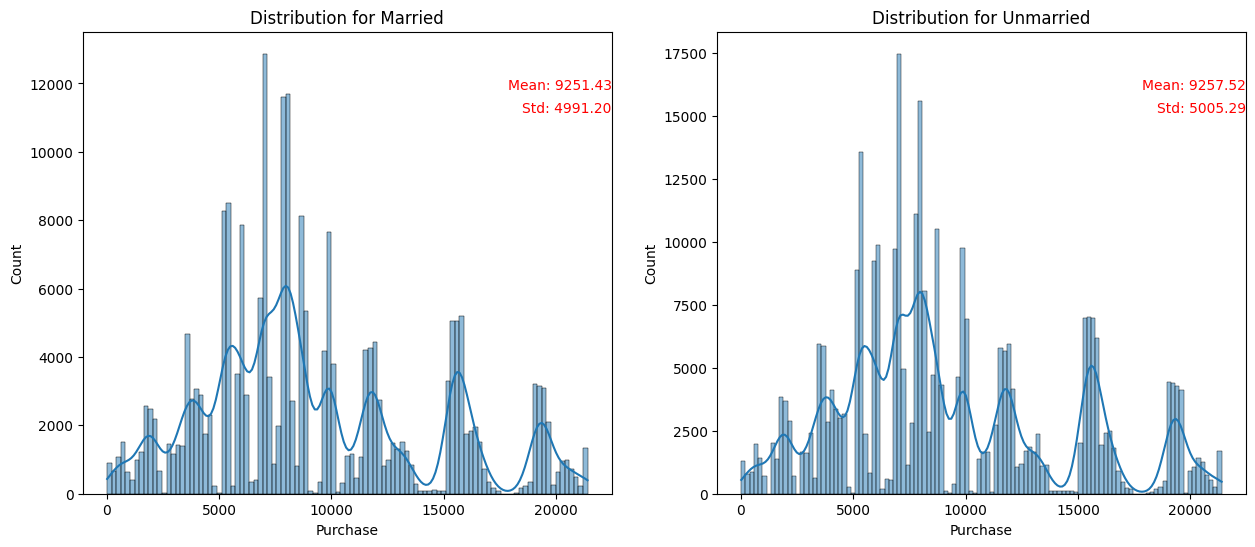

In [63]:
Purchase_married=df[df['Marital_Status']==1]['Purchase']
Purchase_unmarried=df[df['Marital_Status']==0]['Purchase']

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.histplot(Purchase_married,kde=True)
plt.text(plt.xlim()[1], plt.ylim()[1]*0.9, f"Mean: {Purchase_married.mean():.2f}", ha='right', va='top', color='r')
plt.text(plt.xlim()[1], plt.ylim()[1]*0.85, f"Std: {Purchase_married.std():.2f}", ha='right', va='top', color='r')
plt.title('Distribution for Married')

plt.subplot(1,2,2)
sns.histplot(Purchase_unmarried,kde=True)
plt.text(plt.xlim()[1], plt.ylim()[1]*0.9, f"Mean: {Purchase_unmarried.mean():.2f}", ha='right', va='top', color='r')
plt.text(plt.xlim()[1], plt.ylim()[1]*0.85, f"Std: {Purchase_unmarried.std():.2f}", ha='right', va='top', color='r')
plt.title('Distribution for Unmarried')
plt.show()

In [64]:
sample_30_married = [np.mean(Purchase_married.sample(30)) for _ in range(10000)]
sample_300_married = [np.mean(Purchase_married.sample(300)) for _ in range(10000)]
sample_3000_married = [np.mean(Purchase_married.sample(3000)) for _ in range(10000)]
sample_30000_married = [np.mean(Purchase_married.sample(30000)) for _ in range(10000)]
sample_120000_married = [np.mean(Purchase_married.sample(120000)) for _ in range(10000)]

sample_30_unmarried = [np.mean(Purchase_unmarried.sample(30)) for _ in range(10000)]
sample_300_unmarried = [np.mean(Purchase_unmarried.sample(300)) for _ in range(10000)]
sample_3000_unmarried = [np.mean(Purchase_unmarried.sample(3000)) for _ in range(10000)]
sample_30000_unmarried = [np.mean(Purchase_unmarried.sample(30000)) for _ in range(10000)]
sample_120000_unmarried = [np.mean(Purchase_unmarried.sample(120000)) for _ in range(10000)]


In [82]:
# Calculate confidence intervals for each sample size

# Sample size 30
unmarried_95_conf_interval_sample_30 = stats.t.interval(
    0.95, df=len(sample_30_unmarried)-1,
    loc=np.mean(sample_30_unmarried),
    scale=np.std(sample_30_unmarried, ddof=1) / np.sqrt(len(sample_30_unmarried))
)
married_95_conf_interval_sample_30 = stats.t.interval(
    0.95, df=len(sample_30_married)-1,
    loc=np.mean(sample_30_married),
    scale=np.std(sample_30_married, ddof=1) / np.sqrt(len(sample_30_married))
)
print(f'Confidence interval of Unmarried (95%) for sample 30: {unmarried_95_conf_interval_sample_30}')
print(f'Confidence interval of Married (95%) for sample 30: {married_95_conf_interval_sample_30}\n')

# Sample size 300
unmarried_95_conf_interval_sample_300 = stats.t.interval(
    0.95, df=len(sample_300_unmarried)-1,
    loc=np.mean(sample_300_unmarried),
    scale=np.std(sample_300_unmarried, ddof=1) / np.sqrt(len(sample_300_unmarried))
)
married_95_conf_interval_sample_300 = stats.t.interval(
    0.95, df=len(sample_300_married)-1,
    loc=np.mean(sample_300_married),
    scale=np.std(sample_300_married, ddof=1) / np.sqrt(len(sample_300_married))
)
print(f'Confidence interval of Unmarried (95%) for sample 300: {unmarried_95_conf_interval_sample_300}')
print(f'Confidence interval of Married (95%) for sample 300: {married_95_conf_interval_sample_300}\n')

# Sample size 3000
unmarried_95_conf_interval_sample_3000 = stats.t.interval(
    0.95, df=len(sample_3000_unmarried)-1,
    loc=np.mean(sample_3000_unmarried),
    scale=np.std(sample_3000_unmarried, ddof=1) / np.sqrt(len(sample_3000_unmarried))
)
married_95_conf_interval_sample_3000 = stats.t.interval(
    0.95, df=len(sample_3000_married)-1,
    loc=np.mean(sample_3000_married),
    scale=np.std(sample_3000_married, ddof=1) / np.sqrt(len(sample_3000_married))
)
print(f'Confidence interval of Unmarried (95%) for sample 3000: {unmarried_95_conf_interval_sample_3000}')
print(f'Confidence interval of Married (95%) for sample 3000: {married_95_conf_interval_sample_3000}\n')

# Sample size 30000
unmarried_95_conf_interval_sample_30000 = stats.t.interval(
    0.95, df=len(sample_30000_unmarried)-1,
    loc=np.mean(sample_30000_unmarried),
    scale=np.std(sample_30000_unmarried, ddof=1) / np.sqrt(len(sample_30000_unmarried))
)
married_95_conf_interval_sample_30000 = stats.t.interval(
    0.95, df=len(sample_30000_married)-1,
    loc=np.mean(sample_30000_married),
    scale=np.std(sample_30000_married, ddof=1) / np.sqrt(len(sample_30000_married))
)
print(f'Confidence interval of Unmarried (95%) for sample 30000: {unmarried_95_conf_interval_sample_30000}')
print(f'Confidence interval of Married (95%) for sample 30000: {married_95_conf_interval_sample_30000}\n')

# Sample size 120000
unmarried_95_conf_interval_sample_120000 = stats.t.interval(
    0.95, df=len(sample_120000_unmarried)-1,
    loc=np.mean(sample_120000_unmarried),
    scale=np.std(sample_120000_unmarried, ddof=1) / np.sqrt(len(sample_120000_unmarried))
)
married_95_conf_interval_sample_120000 = stats.t.interval(
    0.95, df=len(sample_120000_married)-1,
    loc=np.mean(sample_120000_married),
    scale=np.std(sample_120000_married, ddof=1) / np.sqrt(len(sample_120000_married))
)
print(f'Confidence interval of Unmarried (95%) for sample 120000: {unmarried_95_conf_interval_sample_120000}')
print(f'Confidence interval of Married (95%) for sample 120000: {married_95_conf_interval_sample_120000}\n')

print('Married and Unmarried have overlapping intervals for each considered sample size')

Confidence interval of Unmarried (95%) for sample 30: (9245.077469247575, 9281.14673741909)
Confidence interval of Married (95%) for sample 30: (9222.55244143794, 9258.421001895393)

Confidence interval of Unmarried (95%) for sample 300: (9249.448490077426, 9260.689838255908)
Confidence interval of Married (95%) for sample 300: (9247.283139113091, 9258.619333553577)

Confidence interval of Unmarried (95%) for sample 3000: (9255.468898985706, 9259.051616680965)
Confidence interval of Married (95%) for sample 3000: (9250.33439358445, 9253.896788982216)

Confidence interval of Unmarried (95%) for sample 30000: (9256.684026522298, 9257.763243841035)
Confidence interval of Married (95%) for sample 30000: (9251.41147632972, 9252.444753453614)

Confidence interval of Unmarried (95%) for sample 120000: (9257.208737665771, 9257.658583606726)
Confidence interval of Married (95%) for sample 120000: (9251.228148336202, 9251.616330457131)

Married and Unmarried have overlapping intervals for each c

The confidence intervals for both unmarried and married customers overlap across various sample sizes (30, 300, 3000, 30000 and 120000), indicating no significant difference in spending behavior between the two groups during Black Friday at Walmart. Given this, Walmart could adopt universal marketing strategies that appeal equally to both married and unmarried customers rather than segmenting campaigns based on marital status.

In [66]:
df['Age'].unique()

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

In [69]:
# Confidence interval for age groups
age_groups = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

# List to store confidence intervals
age_group_conf_intervals = []

# Dictionary to store pairs of age groups with non-overlapping confidence intervals
non_overlap_pairs = {}

for age_group in age_groups:
    purchase_age_group = df[df['Age'] == age_group]['Purchase']
    print(f"Age Group: {age_group}")
    print(f"Mean: {purchase_age_group.mean()}")
    print(f"Std: {purchase_age_group.std()}")

    # Sample sizes
    sample_3000_age_group = [np.mean(purchase_age_group.sample(3000)) for _ in range(10000)]

    # 95% Confidence interval
    age_group_95_conf_interval_sample_3000 = stats.norm.interval(0.95, loc=np.mean(sample_3000_age_group), scale=np.std(sample_3000_age_group))

    # Append the confidence interval to the list
    age_group_conf_intervals.append(age_group_95_conf_interval_sample_3000)

    print(f"Confidence interval with 95% confidence level for sample size 3000: {age_group_95_conf_interval_sample_3000}\n")

# Check if confidence intervals overlap
for i in range(len(age_groups)):
    for j in range(i + 1, len(age_groups)):
        if not (age_group_conf_intervals[i][1] >= age_group_conf_intervals[j][0] and
                age_group_conf_intervals[i][0] <= age_group_conf_intervals[j][1]):
            non_overlap_pairs[(age_groups[i], age_groups[j])] = (age_group_conf_intervals[i], age_group_conf_intervals[j])

# Print the pairs of age groups with non-overlapping confidence intervals
if non_overlap_pairs:
    print("Pairs of age groups with non-overlapping confidence intervals:")
    for pair, intervals in non_overlap_pairs.items():
        print(f"{pair[0]} and {pair[1]}: {intervals}")
else:
    print("All pairs of age groups have overlapping confidence intervals.")

Age Group: 0-17
Mean: 8925.539597404317
Std: 5090.078413934693
Confidence interval with 95% confidence level for sample size 3000: (8763.07751974047, 9089.63085585953)

Age Group: 18-25
Mean: 9164.18955448525
Std: 5019.866472461648
Confidence interval with 95% confidence level for sample size 3000: (8984.977037351498, 9341.399056515169)

Age Group: 26-35
Mean: 9244.947059707541
Std: 4990.086123865416
Confidence interval with 95% confidence level for sample size 3000: (9067.065095399692, 9420.539904366975)

Age Group: 36-45
Mean: 9320.888549535055
Std: 4995.487782443235
Confidence interval with 95% confidence level for sample size 3000: (9144.565142735957, 9499.396641930713)

Age Group: 46-50
Mean: 9198.531093411522
Std: 4940.24949602577
Confidence interval with 95% confidence level for sample size 3000: (9025.644894683996, 9371.482304416004)

Age Group: 51-55
Mean: 9519.560427001896
Std: 5048.44770426312
Confidence interval with 95% confidence level for sample size 3000: (9347.98990696

The analysis of spending behavior across different age groups during Black Friday at Walmart reveals that while many age groups exhibit overlapping confidence intervals, certain pairs show **non-overlapping intervals** when using a sample size of 3000. Specifically, the **0-17** age group has a significantly lower spending range compared to **36-45, 51-55, and 55+** age groups. Similarly, the **18-25** group shows a lower spending range than the **51-55** group.  

These findings suggest that younger customers (particularly those aged **0-17 and 18-25**) tend to spend less than older age groups, indicating a statistically significant difference in spending behavior. Walmart could leverage these insights by tailoring promotions and product offerings differently for younger and older customers, potentially targeting older age groups with premium product recommendations and offering budget-friendly deals to younger customers.

In [90]:
import numpy as np
import scipy.stats as stats

# Get unique occupation values
occupations = df["Occupation"].sort_values().unique()

# Dictionary to store confidence intervals
occupation_conf_intervals = {}

# Dictionary to store pairs of occupations with non-overlapping confidence intervals
non_overlap_pairs = {}

# Compute confidence intervals for each occupation
for occ in occupations:
    purchase_occ = df[df["Occupation"] == occ]["Purchase"]

    # Sample size 3000 for each occupation
    sample_3000_occ = [np.mean(purchase_occ.sample(3000, replace=True)) for _ in range(10000)]

    # Compute 95% confidence interval
    ci_occ = stats.t.interval(
        0.95, df=len(sample_3000_occ)-1,
        loc=np.mean(sample_3000_occ),
        scale=np.std(sample_3000_occ, ddof=1) / np.sqrt(len(sample_3000_occ))
    )

    occupation_conf_intervals[occ] = ci_occ

    print(f"Occupation: {occ}")
    print(f"Mean: {np.mean(sample_3000_occ):.2f}, Std: {np.std(sample_3000_occ):.2f}")
    print(f"Confidence interval (95%): {ci_occ}\n")

# Check for non-overlapping confidence intervals
for i in range(len(occupations)):
    for j in range(i + 1, len(occupations)):
        occ1, occ2 = occupations[i], occupations[j]
        ci1, ci2 = occupation_conf_intervals[occ1], occupation_conf_intervals[occ2]

        if not (ci1[1] >= ci2[0] and ci1[0] <= ci2[1]):
            non_overlap_pairs[(occ1, occ2)] = (ci1, ci2)

# Print results for non-overlapping confidence intervals
if non_overlap_pairs:
    print("\nPairs of occupations with non-overlapping confidence intervals:")
    for pair, intervals in non_overlap_pairs.items():
        print(f"Occupation {pair[0]} and {pair[1]}: {intervals}")
else:
    print("\nAll occupations have overlapping confidence intervals.")


Occupation: 0
Mean: 9115.78, Std: 89.88
Confidence interval (95%): (9114.018396617708, 9117.542282648958)

Occupation: 1
Mean: 8943.23, Std: 86.89
Confidence interval (95%): (8941.523656763438, 8944.930365103224)

Occupation: 2
Mean: 8942.29, Std: 88.70
Confidence interval (95%): (8940.550481508213, 8944.027899458451)

Occupation: 3
Mean: 9169.89, Std: 89.62
Confidence interval (95%): (9168.132488093159, 9171.645937840172)

Occupation: 4
Mean: 9206.25, Std: 91.11
Confidence interval (95%): (9204.466049305078, 9208.038272861586)

Occupation: 5
Mean: 9326.39, Std: 91.45
Confidence interval (95%): (9324.601088521917, 9328.186643211413)

Occupation: 6
Mean: 9245.61, Std: 90.34
Confidence interval (95%): (9243.835684284324, 9247.377639682341)

Occupation: 7
Mean: 9417.56, Std: 91.84
Confidence interval (95%): (9415.756904626798, 9419.357484273203)

Occupation: 8
Mean: 9527.40, Std: 89.22
Confidence interval (95%): (9525.648215331139, 9529.14600796886)

Occupation: 9
Mean: 8634.62, Std: 85.1

The analysis of spending behavior across different occupations during Black Friday at Walmart reveals that while many occupations exhibit overlapping confidence intervals, several pairs of occupations show **non-overlapping confidence intervals**, indicating statistically significant differences in spending patterns.  

Notably, **Occupation 0** has non-overlapping intervals with multiple other occupations, suggesting that individuals in this occupation category tend to have distinct spending behavior compared to others. Similarly, **Occupation 1 and Occupation 3, as well as Occupation 1 and Occupation 4**, show non-overlapping confidence intervals, further reinforcing the presence of varied spending habits across different job roles.  

These findings suggest that Walmart could leverage occupation-based marketing strategies, offering targeted promotions and product recommendations to different occupational groups. Higher-spending occupations may be more responsive to premium product offerings, while lower-spending groups could be encouraged through discounts and budget-friendly promotions. Understanding these occupational spending patterns can help Walmart optimize its sales strategies and enhance customer engagement during Black Friday.

In [70]:
# Test if there is a significant difference in spending between males and females.

t_stat, p_value = stats.ttest_ind(male_spending, female_spending, equal_var=False)

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")
if p_value < 0.05:
    print("Significant difference in spending between genders.")
else:
    print("No significant difference in spending between genders.")


T-Statistic: 46.531404666903846, P-Value: 0.0
Significant difference in spending between genders.


In [95]:
# Perform t-test
t_stat_marital, p_value_marital = stats.ttest_ind(Purchase_married, Purchase_unmarried, equal_var=False)

print(f"T-Statistic (Marital Status): {t_stat_marital}, P-Value: {p_value_marital}")
if p_value_marital < 0.05:
    print("Significant difference in spending between married and unmarried customers.")
else:
    print("No significant difference in spending between married and unmarried customers.")


T-Statistic (Marital Status): -0.44430843794144725, P-Value: 0.6568197995547738
No significant difference in spending between married and unmarried customers.


In [99]:
import scipy.stats as stats
import numpy as np

# Extract purchase data for each age group
age_groups = df["Age"].sort_values().unique()
age_spending = [df[df["Age"] == age]["Purchase"] for age in age_groups]

# Step 1: Check Normality using Shapiro-Wilk Test
print("Shapiro-Wilk Normality Test:")
for age, spending in zip(age_groups, age_spending):
    stat, p = stats.shapiro(spending.sample(500, replace=True) if len(spending) > 500 else spending)  # Sample if needed
    print(f"Age Group {age}: W={stat:.4f}, p={p:.4f}")
    if p < 0.05:
        print("   -> Data is NOT normally distributed.")
    else:
        print("   -> Data is normally distributed.")

print("\n" + "="*60)

# Step 2: Check Homogeneity of Variance using Levene's Test
stat_levene, p_levene = stats.levene(*age_spending)
print(f"Levene’s Test for Homogeneity of Variance: W={stat_levene:.4f}, p={p_levene:.4f}")
if p_levene < 0.05:
    print("   -> Variances are NOT equal across age groups (violates homogeneity).")
else:
    print("   -> Variances are equal across age groups (homogeneity holds).")

print("\n" + "="*60)

# Step 3: Perform One-Way ANOVA
f_stat, p_value = stats.f_oneway(*age_spending)
print(f"ANOVA F-Statistic: {f_stat:.4f}, P-Value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in spending across age groups.\n")
else:
    print("No significant difference in spending across age groups.\n")


# Perform Kruskal-Wallis Test
h_stat, p_value = stats.kruskal(*age_spending)

# Print results
print(f"Kruskal-Wallis H-Statistic: {h_stat:.4f}, P-Value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in spending across age groups (non-parametric test).")
else:
    print("No significant difference in spending across age groups.")

Shapiro-Wilk Normality Test:
Age Group 0-17: W=0.9667, p=0.0000
   -> Data is NOT normally distributed.
Age Group 18-25: W=0.9493, p=0.0000
   -> Data is NOT normally distributed.
Age Group 26-35: W=0.9444, p=0.0000
   -> Data is NOT normally distributed.
Age Group 36-45: W=0.9594, p=0.0000
   -> Data is NOT normally distributed.
Age Group 46-50: W=0.9472, p=0.0000
   -> Data is NOT normally distributed.
Age Group 51-55: W=0.9572, p=0.0000
   -> Data is NOT normally distributed.
Age Group 55+: W=0.9335, p=0.0000
   -> Data is NOT normally distributed.

Levene’s Test for Homogeneity of Variance: W=12.3829, p=0.0000
   -> Variances are NOT equal across age groups (violates homogeneity).

ANOVA F-Statistic: 39.3012, P-Value: 0.0000
There is a significant difference in spending across age groups.

Kruskal-Wallis H-Statistic: 315.6009, P-Value: 0.0000
There is a significant difference in spending across age groups (non-parametric test).
